In [882]:
import pandas as pd
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [883]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [884]:
col = df.columns.tolist()
len(col)

11

In [885]:
df_x = df[col[0:10]]
df_x.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930


In [886]:
df_y = df["target"]
df_y.head(3)

0    151.0
1     75.0
2    141.0
Name: target, dtype: float64

In [887]:
df_x, df_y = df_x.values, df_y.values
df_x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [888]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [889]:
train_input, test_input, train_target, test_target = train_test_split(df_x, df_y, test_size=0.2)

In [890]:
W = np.random.rand(10)
b = np.random.rand()

In [891]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [892]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()
    rmse = mse ** 0.5
    return rmse

In [893]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = RMSE(predictions, y)
    return L

In [894]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [895]:
LEARNING_RATE = 0.1
losses = []

for i in range(1, 2001):
    dW, db = gradient(train_input, W, b, train_target)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(train_input, W, b, train_target)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.3f' % (i, L))

Iteration 100 : Loss 71.242
Iteration 200 : Loss 67.764
Iteration 300 : Loss 65.056
Iteration 400 : Loss 62.938
Iteration 500 : Loss 61.269
Iteration 600 : Loss 59.939
Iteration 700 : Loss 58.867
Iteration 800 : Loss 57.990
Iteration 900 : Loss 57.264
Iteration 1000 : Loss 56.654
Iteration 1100 : Loss 56.135
Iteration 1200 : Loss 55.689
Iteration 1300 : Loss 55.301
Iteration 1400 : Loss 54.961
Iteration 1500 : Loss 54.660
Iteration 1600 : Loss 54.393
Iteration 1700 : Loss 54.155
Iteration 1800 : Loss 53.941
Iteration 1900 : Loss 53.749
Iteration 2000 : Loss 53.576


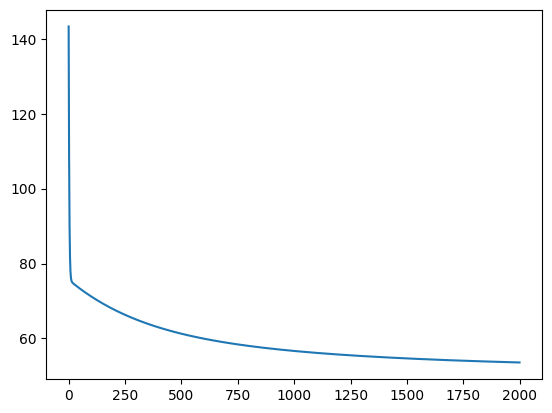

In [896]:
plt.plot(losses)
plt.show()

In [897]:
prediction = model(test_input, W, b)
rmse = loss(test_input, W, b, test_target)
rmse

62.306077649593746

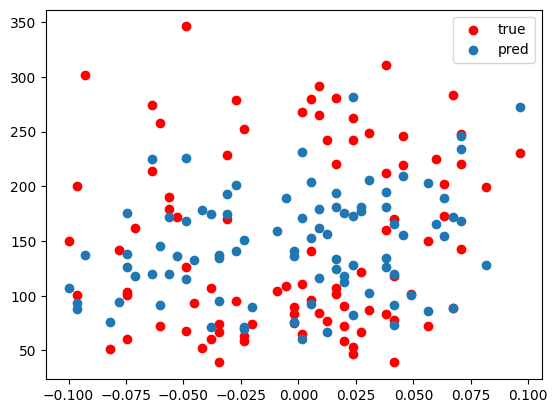

In [898]:
plt.scatter(test_input[:, 0], test_target, label="true", color = "red")
plt.scatter(test_input[:, 0], prediction, label="pred")
plt.legend()
plt.show()